In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, normalize
from sklearn.metrics import mean_squared_error


In [2]:
# configure plots
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6,4

# Data

## Raw Data

In [3]:
X = pd.read_csv('./9_Station/X.csv', index_col=0)
y = pd.read_csv('./9_Station/y.csv', index_col=0)

In [173]:
y.head()

,pt,q,q/pt,eta_median,phi_median,theta_median,hit_count
0,30.163197,1.0,0.033153,1.620299,141.058455,22.381725,6.0
1,45.874340,1.0,0.021799,2.020179,-141.673995,15.110317,8.0
2,89.106621,-1.0,-0.011223,1.684747,-110.063550,21.016869,7.0
3,58.869408,1.0,0.016987,2.388656,113.099700,10.484757,8.0
4,57.881783,1.0,0.017277,2.125661,47.813921,13.612605,8.0


In [7]:
X = X.fillna(0)

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

# Baseline Model

In [9]:
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 80, max_depth = 10)

## Predict pt

In [10]:
regressor_RF.fit(X_train, y_train['pt'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [11]:
y_pred = regressor_RF.predict(X_test)

# Visualize Baseline Model

In [12]:
visual = y_test.reset_index()

## Predict pt

In [15]:
visual['pt_pred'] = y_pred

In [16]:
visual['delta_1/pt'] = 1/visual['pt'] - 1/visual['pt_pred']

In [17]:
visual['relative_delta'] = (visual['pt_pred'] - visual['pt']) / visual['pt']

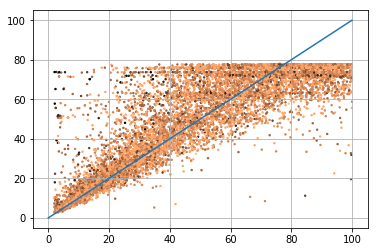

In [18]:
visual_sample = visual.sample(n = 10000)
fig, ax = plt.subplots()
line = [0, 100]
ax.plot(line, line)
ax.scatter(visual_sample['pt'], 
           visual_sample['pt_pred'], 
           c = visual_sample['hit_count'], 
           cmap = 'copper', 
           s = 2, 
           alpha = 1
          )
# plt.ylim(-1, 1)
ax.grid(True)

## Bias and Resolution

In [19]:
points = range(2, 100)
bias = []
resolution = []

In [20]:
for i in points:
    temp = visual[(visual['pt']>i) & (visual['pt']<i+1)]
    bias.append(temp['delta_1/pt'].mean())
    resolution.append(temp['delta_1/pt'].std())
#     resolution.append((temp['delta_1/pt'].max() - temp['delta_1/pt'].min())/2)

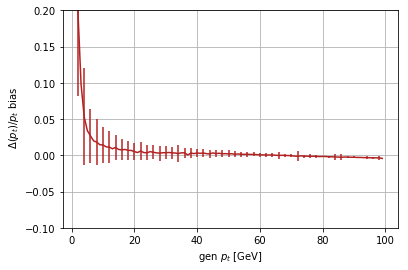

In [23]:
fig, ax = plt.subplots()
ax.errorbar(points, bias, color='firebrick', yerr=resolution, errorevery=2)
plt.ylim(-0.1, 0.2)
ax.set(xlabel=r'gen $p_t$ [GeV]', ylabel=r' $\Delta(p_t)/p_t$ bias')
ax.grid(True)
# ax.set_title('all errorbars')
fig.savefig('9s_bdt.jpg', format='jpg', dpi=900)

In [22]:
visual.to_csv('result_9_full_bdt_run1.csv')